# SVTH: Trương Huệ Dinh ||   MSV: 19DH110749
# GVHD: th. Nguyễn Tuấn Đăng






---





# Mục Tiêu phân tích
* Theo nghiên cứu, người ta thấy rằng những cá nhân có nhiều khả năng quyên góp tiền cho tổ chức từ thiện nhất là những người kiếm được hơn 50.000 đô la. Do đó, mục tiêu chính của dự án là dự đoán liệu một cá nhân có kiếm được hơn 50.000 đô la một năm hay không.

* Trong bài này, nhóm em sẽ sử dụng một số thuật toán (Gradient Boosting Tree Classifier,Random Forest,..)  khác nhau để dự đoán chính xác thu nhập của các cá nhân. Sau đó, chúng tôi sẽ chọn thuật toán tốt nhất từ các kết quả sơ bộ và tiếp tục tối ưu hóa thuật toán này để mô hình hóa dữ liệu tốt nhất. Mục tiêu của chúng tôi với việc triển khai này là xây dựng một mô hình dự đoán chính xác những cá nhân kiếm được ít hơn hoặc bằng 50.000 đô la và cả những người kiếm được nhiều hơn số tiền tương tự.
# Mô tả dữ liệu :
Dữ liệu đã được lấy từ Kho lưu trữ học máy của UCI và có thể tải xuống từ đây. Nó có 35.521 quan sát và 14 thuộc tính: [tuổi,công nhân,fnlwgt,education,education-num,marital-status,ococation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native- country ,thu nhập]

 Để xác định chính xác liệu một cá nhân có kiếm được nhiều hơn số tiền nhất định hay không, người ta có thể xác định các tính năng mà Thu nhập có nhiều khả năng phụ thuộc nhất:

 Dưới đây là một số yếu tố mà tôi nghĩ có thể ảnh hưởng đến Thu nhập/Thu nhập:

* Tuổi tác: Những người có tuổi tác cao hơn có khả năng kiếm được nhiều tiền hơn
Học vấn: Trình độ học vấn cao hơn (đã hoàn thành tốt nghiệp hoặc có bằng tiến sĩ), có nhiều khả năng kiếm được hơn $50K một năm
* Tình trạng hôn nhân: Những người đã kết hôn có nhiều khả năng kiếm được thu nhập cao hơn.
* Tăng vốn: Những cá nhân có số tiền tăng vốn đáng kể trong một năm, cho thấy họ có tài sản ngoài thu nhập chính của họ
* Quốc gia bản địa : Những cá nhân cư trú hoặc thuộc về các quốc gia thuộc thế giới thứ nhất có xu hướng quyên góp nhiều hơn và cũng kiếm được nhiều tiền hơn.
* Mô hình được sử dụng
 Decision Tree
 Random Forest
 Gradient Boosting
*Số liệu đánh giá được sử dụng:
Khu vực dưới ROC
Khu vực dưới PF
Sự chính xác
Thu được độ chính xác 84,7 và 0,9 AUC trong Mô hình Gradient Boost


#Importing Necessary Lib

In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 43 kB/s 
     |████████████████████████████████| 199 kB 66.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=211806a53ea0775b7d47ffc2431523585f17e3158fa17074c6755a87bff5bb91
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [2]:
!pip install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install spark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 88 kB/s 
  Created wheel for spark: filename=spark-0.2.1-py3-none-any.whl size=58761 sha256=209c36dbe8f689caa39cd0a1dfb228714d86009e02c8e355dbe1f8bc01c53bdc
  Stored in directory: /root/.cache/pip/wheels/c5/19/ff/9b16f354528bc9698ec3286be7947ebbf1f8391325553961d4
Successfully built spark


In [4]:
from pyspark.sql import Row
from pyspark import SQLContext
from pyspark.sql import functions as f
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier, GBTClassifier, RandomForestClassifier, LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator,MulticlassClassificationEvaluator
from pyspark import SparkConf, SparkContext, SQLContext
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# First let's create our PySpark instance
# import findspark
# findspark.init()

import pyspark # only run after findspark.init()
from pyspark.sql import SparkSession
# May take awhile locally
spark = SparkSession.builder.appName("Select").getOrCreate()

cores = spark._jsc.sc().getExecutorMemoryStatus().keySet().size()
print("You are working with", cores, "core(s)")
spark

You are working with 1 core(s)


#Read Data

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
data = spark.read.csv('/content/drive/MyDrive/Colab Notebooks/adult/adult.data', header=False, inferSchema=True, ignoreLeadingWhiteSpace=True)

#Data Size
* Dataset bao gồm 32561 dòng

In [9]:
data.count()

32561

In [11]:
data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: integer (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: integer (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: integer (nullable = true)
 |-- _c11: integer (nullable = true)
 |-- _c12: integer (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)



In [12]:
data.show()

+---+----------------+------+------------+---+--------------------+-----------------+-------------+------------------+------+-----+----+----+-------------+-----+
|_c0|             _c1|   _c2|         _c3|_c4|                 _c5|              _c6|          _c7|               _c8|   _c9| _c10|_c11|_c12|         _c13| _c14|
+---+----------------+------+------------+---+--------------------+-----------------+-------------+------------------+------+-----+----+----+-------------+-----+
| 39|       State-gov| 77516|   Bachelors| 13|       Never-married|     Adm-clerical|Not-in-family|             White|  Male| 2174|   0|  40|United-States|<=50K|
| 50|Self-emp-not-inc| 83311|   Bachelors| 13|  Married-civ-spouse|  Exec-managerial|      Husband|             White|  Male|    0|   0|  13|United-States|<=50K|
| 38|         Private|215646|     HS-grad|  9|            Divorced|Handlers-cleaners|Not-in-family|             White|  Male|    0|   0|  40|United-States|<=50K|
| 53|         Private|234721

# Initialising column names for header (Khởi tạo tên côt cho tiêu đề)

In [13]:
col_names = ["age", "workclass", "fnlwgt", "education", 
             "education-num", "marital-status", "occupation", 
             "relationship", "race", "sex", "capital-gain", 
             "capital-loss", "hours-per-week", "native-country", 
             "earnings"]

## rename cols theo col_names sau đó loại bỏ cột giá trị null

In [14]:
data= data.select([f.col(old).alias(new) for old, new in zip(data.columns, col_names)])
data= data.drop('fnlwgt')
data=data.dropna("any")

In [15]:
data.head()

Row(age=39, workclass='State-gov', education='Bachelors', education-num=13, marital-status='Never-married', occupation='Adm-clerical', relationship='Not-in-family', race='White', sex='Male', capital-gain=2174, capital-loss=0, hours-per-week=40, native-country='United-States', earnings='<=50K')

#Count of Target Variable (Số lượng biến mục tiêu)

In [16]:
data.groupby('earnings').count().show()

+--------+-----+
|earnings|count|
+--------+-----+
|   <=50K|24720|
|    >50K| 7841|
+--------+-----+



In [17]:
x= ["<=50K",">50K"]
y = [24720,7841]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Energy Consumed by Lights')

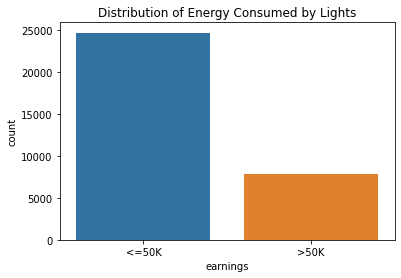

In [19]:
lights = sns.barplot(x , y)
lights.set_xlabel('earnings')
lights.set_ylabel('count')
lights.set_title('Distribution of Energy Consumed by Lights')

#Displaying Dataset's Schema (Hiển thị lược đồ của Dataset)

In [20]:
data.printSchema()

root
 |-- age: integer (nullable = true)
 |-- workclass: string (nullable = true)
 |-- education: string (nullable = true)
 |-- education-num: integer (nullable = true)
 |-- marital-status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- capital-gain: integer (nullable = true)
 |-- capital-loss: integer (nullable = true)
 |-- hours-per-week: integer (nullable = true)
 |-- native-country: string (nullable = true)
 |-- earnings: string (nullable = true)



#Changing target column elements : '0' for <=50K and '1' for >50K

In [21]:
data = data.withColumn('income', f.when(data.earnings == '<=50K', 0).otherwise(1))
# Drop the Income label
data = data.drop('earnings')
# Show dataset's columns
data.columns

['age',
 'workclass',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

#Exploratory Data Analysis (Phân tích dữ liệu thăm dò)

In [22]:
dd=data.toPandas()

In [23]:
dd.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


#Univariate Analysis (Phân tích đơn biến)

#Categorical Columns(Cột phân loại)

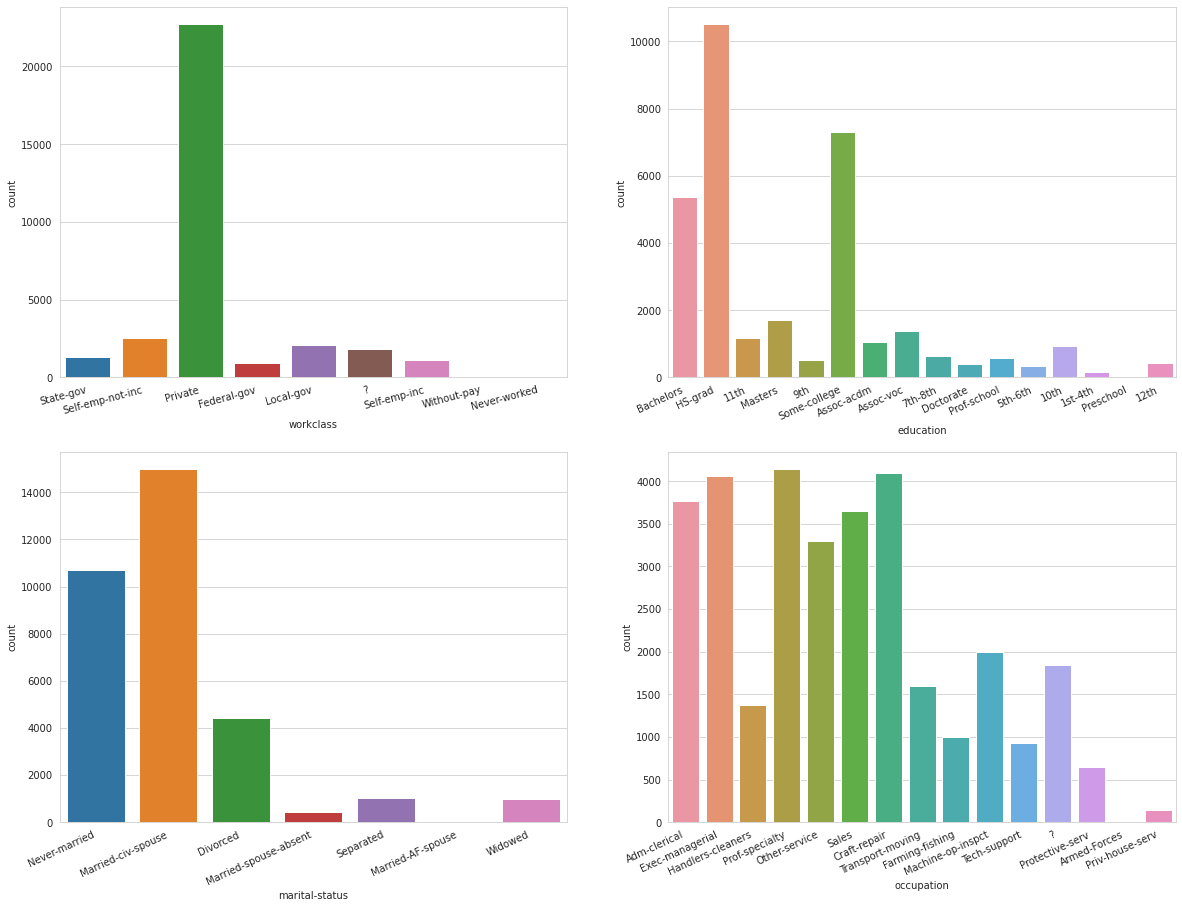

In [24]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,15)) 

#workclass
plt.subplot(221) 
sns.countplot(x='workclass',data=dd)
plt.xticks(rotation=15, horizontalalignment='right')
#education
plt.subplot(222) 
sns.countplot(x='education',data=dd) 
plt.xticks(rotation=25, horizontalalignment='right')
#marital-status
plt.subplot(223) 
sns.countplot(x='marital-status',data=dd)
plt.xticks(rotation=25, horizontalalignment='right')
#Occupation
plt.subplot(224) 
sns.countplot(x='occupation',data=dd)
plt.xticks(rotation=25, horizontalalignment='right')
plt.show()

Quan sát
* Hầu hết mọi người làm việc trong Private Industry
* Hầu hết mọi người đều đã tốt người Trung Hoc
* Kết hôn-dân sự-Vợ chồng là cao nhất
* Exec-manager, Professional Speciality, Craft-Repait gần giống nhau

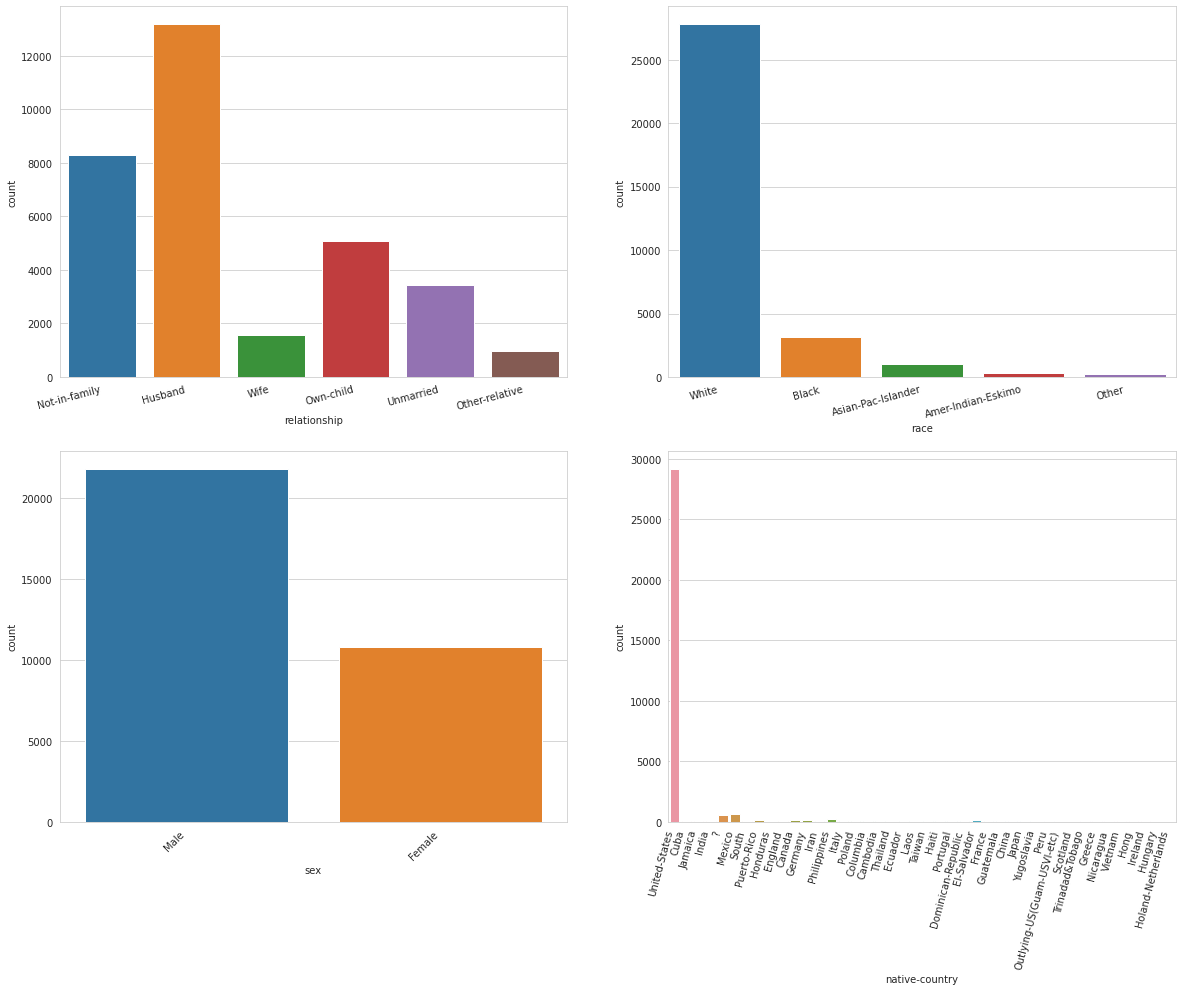

In [25]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,15)) 
#relationship
plt.subplot(221) 
sns.countplot(x='relationship',data=dd)
plt.xticks(rotation=15, horizontalalignment='right')
#race
plt.subplot(222) 
sns.countplot(x='race',data=dd)
plt.xticks(rotation=15, horizontalalignment='right')
#sex
plt.subplot(223) 
sns.countplot(x='sex',data=dd)
plt.xticks(rotation=45, horizontalalignment='right')
#native-country
plt.subplot(224) 
sns.countplot(x='native-country',data=dd)
plt.xticks(rotation=75, horizontalalignment='right')
plt.show()

Quan sát : Điều đáng chú ý duy nhất ở đây là hầu hết mọi người đều có quê quán là Hoa Kỳ

# Numerical Variables (Biến số)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

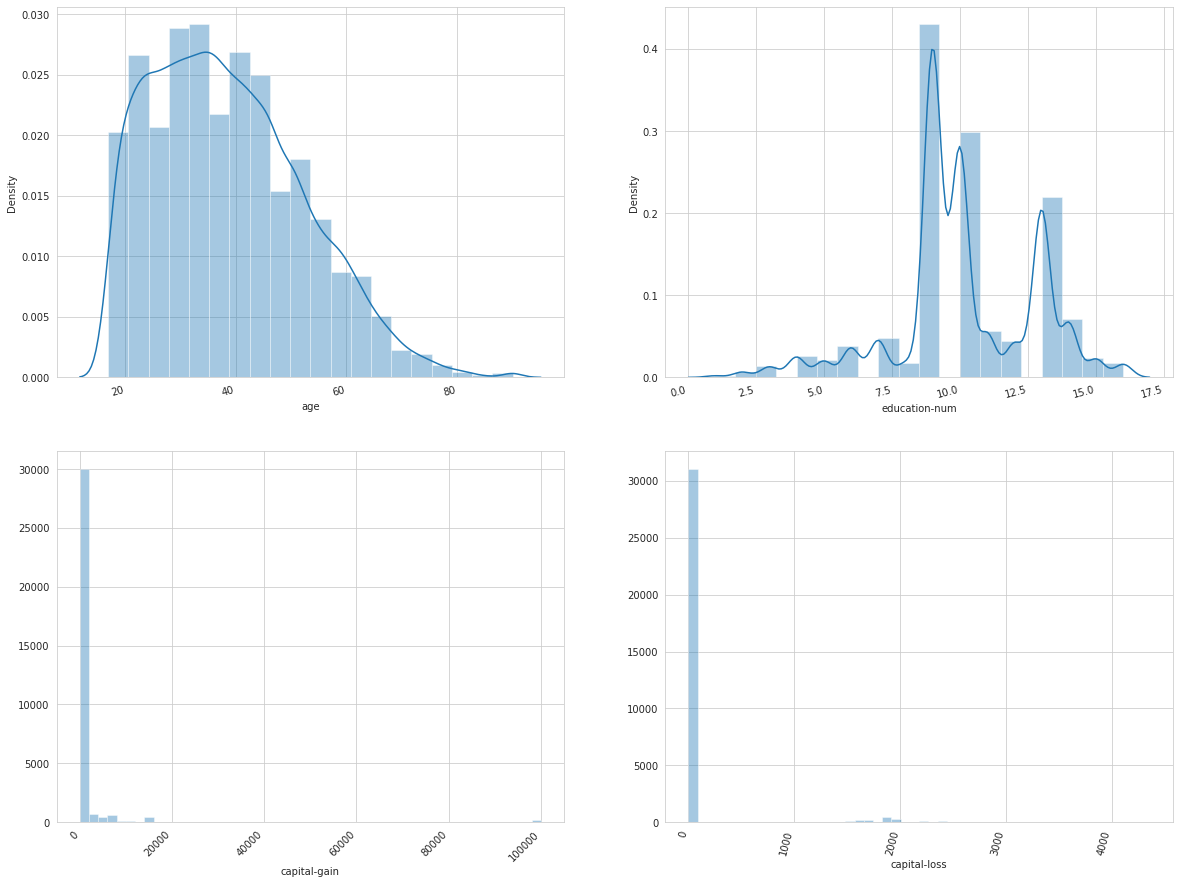

In [26]:
plt.figure(figsize=(20,15)) 
#age
plt.subplot(221) 
sns.distplot(dd['age'],bins=20)
plt.xticks(rotation=15, horizontalalignment='right')
#education-num
plt.subplot(222) 
sns.distplot(dd['education-num'],bins=20)
plt.xticks(rotation=15, horizontalalignment='right')
#capital-gain
plt.subplot(223) 
sns.distplot(dd['capital-gain'],kde=False)
plt.xticks(rotation=45, horizontalalignment='right')
#capital-loss
plt.subplot(224) 
sns.distplot(dd['capital-loss'],kde=False)
plt.xticks(rotation=75, horizontalalignment='right')
plt.show()

# Bivariate Analysis(Phân tích hai biến)

# Categorical Columns (Cột phân loại)

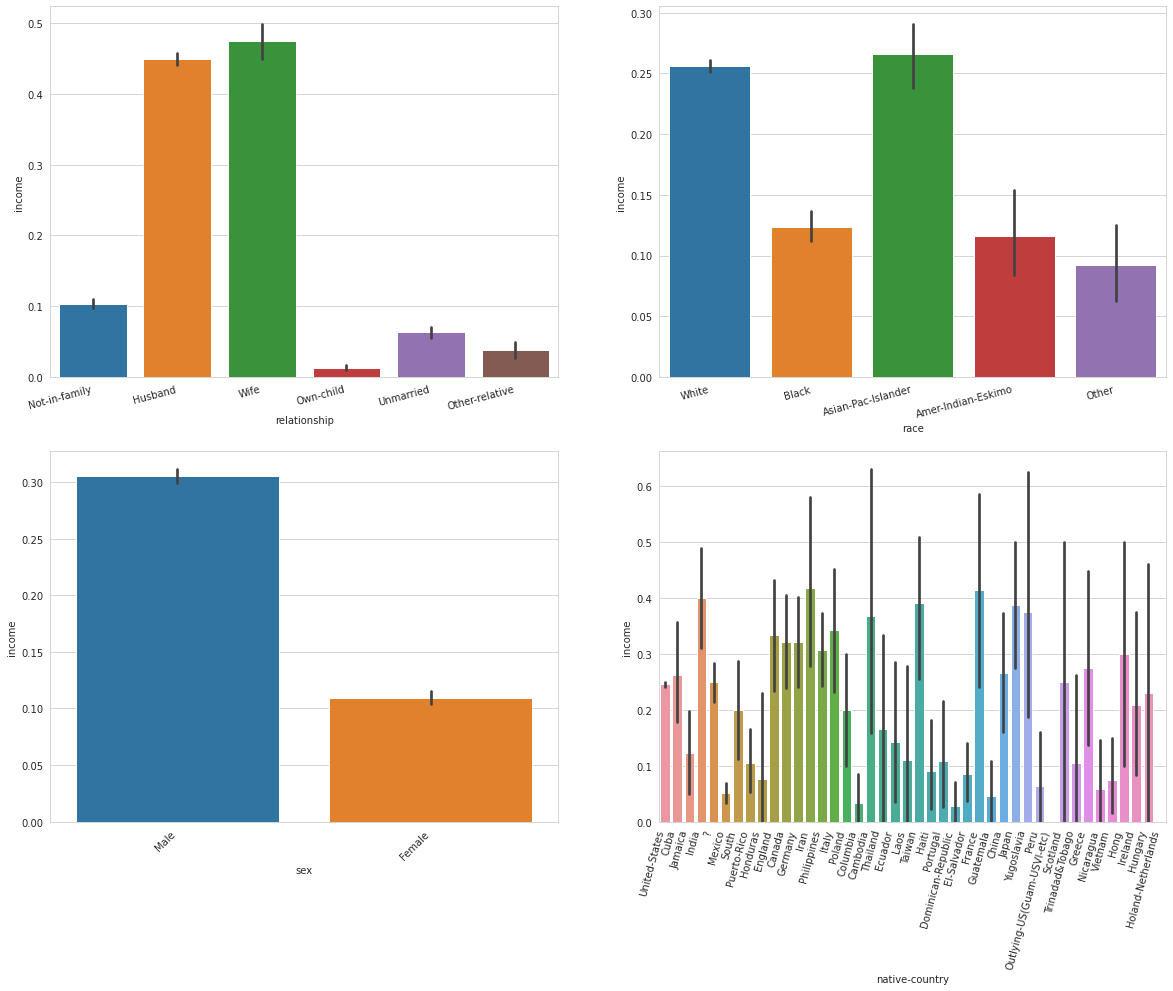

In [27]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,15)) 
#relationship
plt.subplot(221) 
sns.barplot(x='relationship',y='income',data=dd)
plt.xticks(rotation=15, horizontalalignment='right')
#race
plt.subplot(222) 
sns.barplot(x='race',y='income',data=dd)
plt.xticks(rotation=15, horizontalalignment='right')
#sex
plt.subplot(223) 
sns.barplot(x='sex',y='income',data=dd)
plt.xticks(rotation=45, horizontalalignment='right')
#native-country
plt.subplot(224) 
sns.barplot(x='native-country',y='income',data=dd)
plt.xticks(rotation=75, horizontalalignment='right')
plt.show()

Quan sát
* Vợ hoặc Chồng hướng tới thu nhập cao hơn, tức là lớn hơn 50K
* Không thể suy ra nhiều từ Race
* Nam giới có xu hướng kiếm được nhiều tiền hơn (điều này có nhiều khả năng bị sai lệch vì có nhiều nam giới hơn trong dữ liệu)
* Biểu đồ cho thấy Iran và Gautemala có nhiều người có thu nhập cao hơn nhưng điều đó có phương sai rất cao (được hiển thị bằng dòng trên thanh), nhưng Hoa Kỳ cho thấy rằng những người của họ có phương sai thấp ít nhiều được tính cho> 50K và <=50K là như nhau


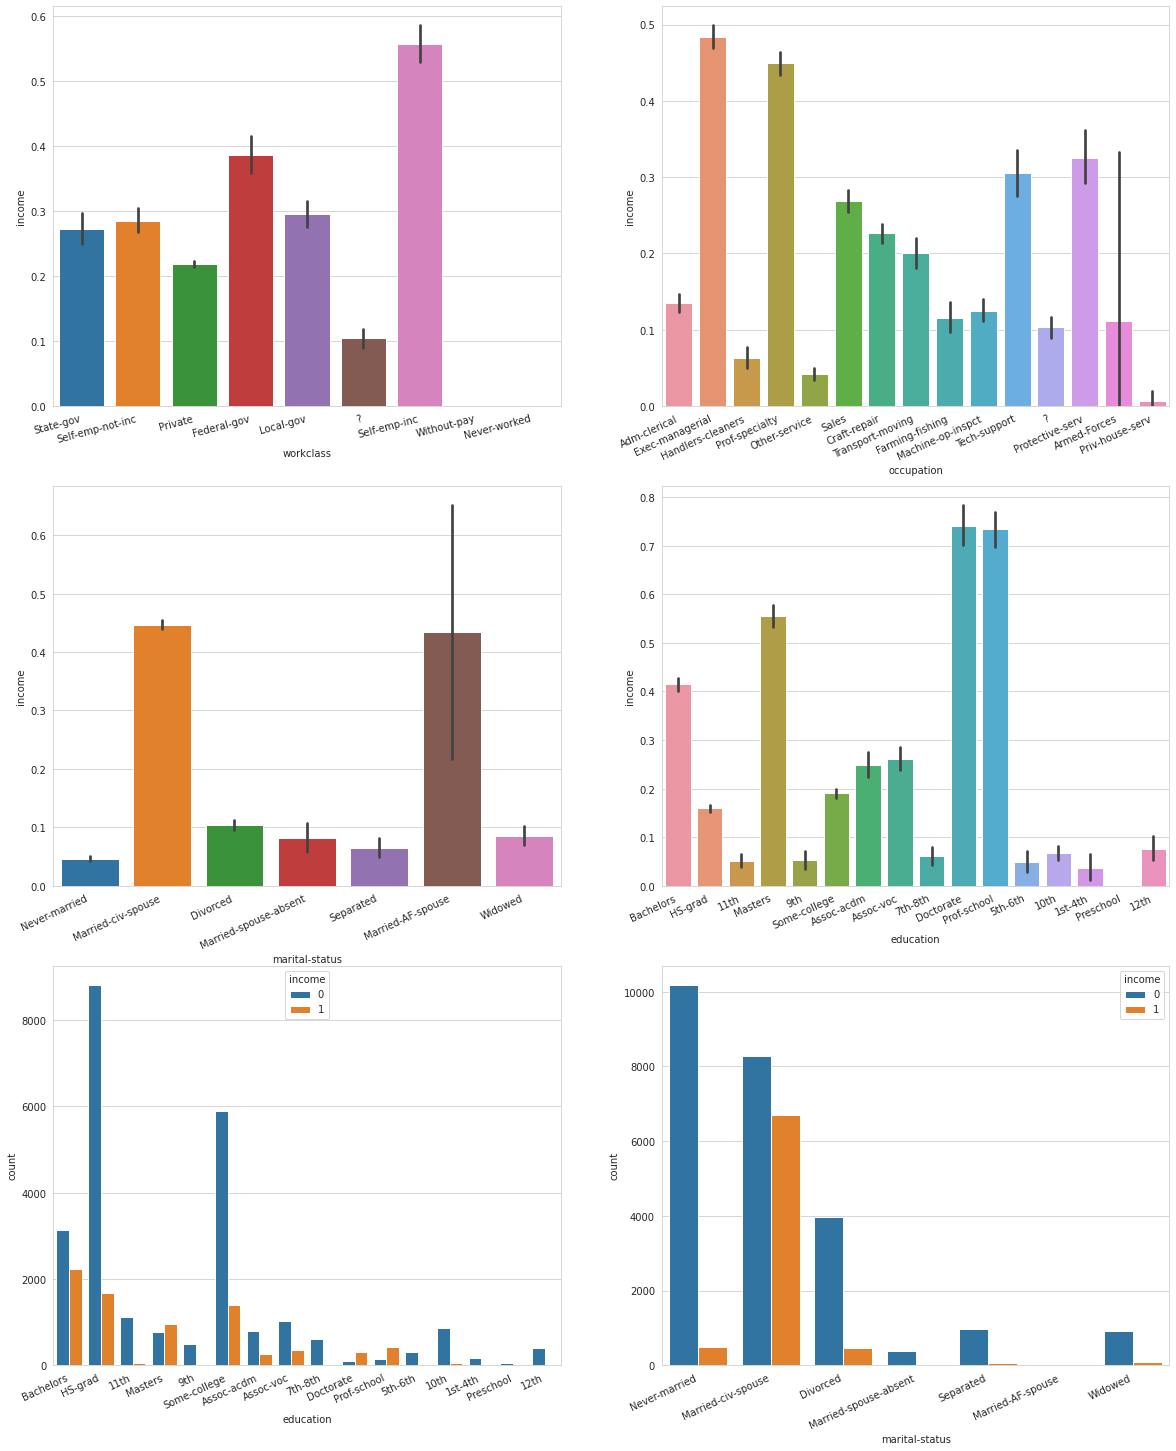

In [28]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,25)) 
#workclass
plt.subplot(321) 
sns.barplot(x='workclass',y='income',data=dd)
plt.xticks(rotation=15, horizontalalignment='right')
#education
plt.subplot(322) 
sns.barplot(x='occupation',y='income',data=dd)
plt.xticks(rotation=25, horizontalalignment='right')
#marital-status
plt.subplot(323) 
sns.barplot(x='marital-status',y='income',data=dd)
plt.xticks(rotation=25, horizontalalignment='right')
#Occupation
plt.subplot(324) 
sns.barplot(x='education',y='income',data=dd)
plt.xticks(rotation=25, horizontalalignment='right')
plt.subplot(325) 
sns.countplot(x='education',hue='income',data=dd)
plt.xticks(rotation=25, horizontalalignment='right')
#marital-status
plt.subplot(326) 
sns.countplot(x='marital-status',hue='income',data=dd)
plt.xticks(rotation=25, horizontalalignment='right')
plt.show()

Quan sát
* Self-emp-Inc có nhiều thu nhập hơn
* Tiến sĩ và trường chuyên nghiệp có nhiều thu nhập hơn với ít phương sai hơn cho thấy những người có trình độ học vấn cao hơn hoặc kỹ năng chuyên môn có nhiều khả năng kiếm được hơn 50 nghìn
* Như được suy ra từ mối quan hệ biến đổi ở đây cả tình trạng hôn nhân Kết hôn với vợ hoặc chồng có nhiều khả năng kiếm được nhiều tiền hơn
* Trong Nghề nghiệp, có thể thấy rằng những người ở vị trí điều hành hoặc có kỹ năng chuyên nghiệp có nhiều khả năng kiếm được nhiều tiền hơn

#Numerical Columns (Cột số)

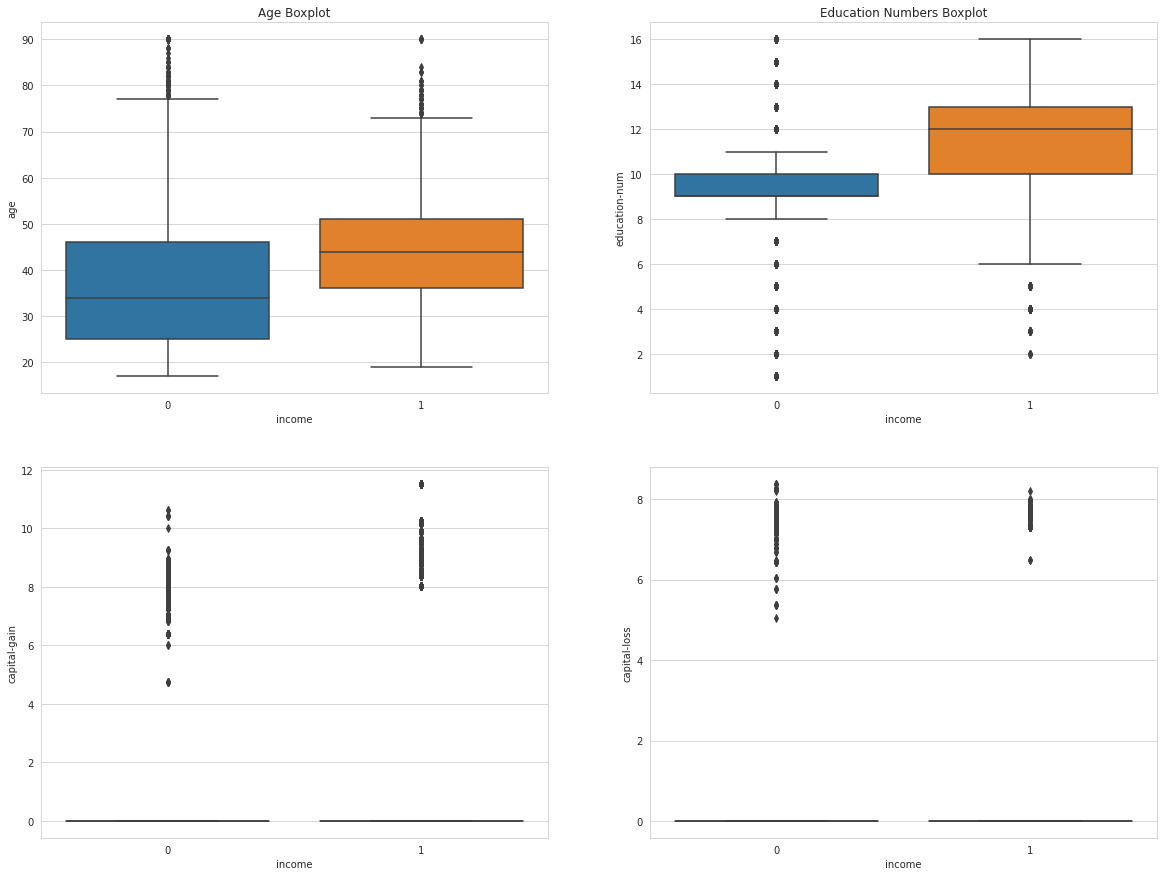

In [29]:
import numpy as np
sns.set_style('whitegrid')
plt.figure(figsize=(20,15)) 
#workclass
plt.subplot(221) 
sns.boxplot(x='income',y='age',data=dd)
plt.title('Age Boxplot')
#education
plt.subplot(222) 
sns.boxplot(x='income',y='education-num',data=dd)
plt.title('Education Numbers Boxplot')
dd['capital-gain'] = dd['capital-gain'].apply(lambda x: np.log(x + 1))
dd['capital-loss'] = dd['capital-loss'].apply(lambda x: np.log(x + 1))
plt.subplot(223) 
sns.boxplot(x='income',y='capital-gain',data=dd)
#Occupation
plt.subplot(224) 
sns.boxplot(x='income',y='capital-loss',data=dd)
plt.show()

#Data Preprocessing (Tiền xử lý dữ liệu)

In [30]:
categorical_columns = [ 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'hours-per-week', 'native-country', ]

#Vectorizing Numerical Features and One-Hot Encoding Categorical Features(Vectorizing các tính năng số và các tính năng phân loại mã hóa một lần)

Để mã hóa One-Hot các tính năng phân loại, trước tiên chúng tôi sẽ chuyển chúng qua bộ chỉ mục và sau đó tới bộ mã hóa.

In [31]:
indexers = [StringIndexer(inputCol=c, outputCol="{0}_indexed".format(c))  for c in categorical_columns]
# The encode of indexed values multiple columns
encoders = [OneHotEncoder(dropLast=False,inputCol=indexer.getOutputCol(), outputCol="{0}_encoded".format(indexer.getOutputCol())) for indexer in indexers]

#Joining the categorical encoded features with the numerical ones and making a vector with both of them (Kết hợp các tính năng được mã hóa phân loại với các tính năng số và tạo một vectơ với cả hai tính năng đó.)

In [32]:
# Vectorizing encoded values
categorical_encoded = [encoder.getOutputCol() for encoder in encoders]

numerical_columns = ['age', 'education-num', 'capital-gain', 'capital-loss']
inputcols = categorical_encoded + numerical_columns
#assembling and making a vector
assembler = VectorAssembler(inputCols=inputcols, outputCol="features")

# Setting up a pipeline to automatize the stages (Thiết lập pipeline để tự động hóa các giai đoạn)

In [33]:
pipeline = Pipeline(stages=indexers + encoders + [assembler] )
model = pipeline.fit(data)

# Transform data
tform_data = model.transform(data)
display(tform_data)

DataFrame[age: int, workclass: string, education: string, education-num: int, marital-status: string, occupation: string, relationship: string, race: string, sex: string, capital-gain: int, capital-loss: int, hours-per-week: int, native-country: string, income: int, workclass_indexed: double, education_indexed: double, marital-status_indexed: double, occupation_indexed: double, relationship_indexed: double, race_indexed: double, sex_indexed: double, hours-per-week_indexed: double, native-country_indexed: double, workclass_indexed_encoded: vector, education_indexed_encoded: vector, marital-status_indexed_encoded: vector, occupation_indexed_encoded: vector, relationship_indexed_encoded: vector, race_indexed_encoded: vector, sex_indexed_encoded: vector, hours-per-week_indexed_encoded: vector, native-country_indexed_encoded: vector, features: vector]

#Finally select a dataset only with the relevant features(Cuối cùng, chỉ chọn một tập dữ liệu với các tính năng có liên quan.)



In [34]:
final_data = tform_data.select('features', 'income')

#Scalling Data(Thu nhỏ dữ liệu)

In [35]:
from pyspark.ml.feature import StandardScaler
standardScaler = StandardScaler(inputCol="features", outputCol="features_scaled")
scaler = standardScaler.fit(final_data)
final_data_2 = scaler.transform(final_data)
final_data_2.take(2)

[Row(features=SparseVector(200, {4: 1.0, 11: 1.0, 26: 1.0, 35: 1.0, 48: 1.0, 53: 1.0, 58: 1.0, 60: 1.0, 154: 1.0, 196: 39.0, 197: 13.0, 198: 2174.0}), income=0, features_scaled=SparseVector(200, {4: 5.1114, 11: 2.6976, 26: 2.1298, 35: 3.1253, 48: 2.2941, 53: 2.8342, 58: 2.1254, 60: 2.0043, 154: 3.2739, 196: 2.8591, 197: 5.053, 198: 0.2944})),
 Row(features=SparseVector(200, {1: 1.0, 11: 1.0, 25: 1.0, 34: 1.0, 47: 1.0, 53: 1.0, 58: 1.0, 117: 1.0, 154: 1.0, 196: 50.0, 197: 13.0}), income=0, features_scaled=SparseVector(200, {1: 3.7281, 11: 2.6976, 25: 2.0064, 34: 3.025, 47: 2.0369, 53: 2.8342, 58: 2.1254, 117: 37.6384, 154: 3.2739, 196: 3.6656, 197: 5.053}))]

In [36]:
final_data_2.show(5)

+--------------------+------+--------------------+
|            features|income|     features_scaled|
+--------------------+------+--------------------+
|(200,[4,11,26,35,...|     0|(200,[4,11,26,35,...|
|(200,[1,11,25,34,...|     0|(200,[1,11,25,34,...|
|(200,[0,9,27,41,4...|     0|(200,[0,9,27,41,4...|
|(200,[0,14,25,41,...|     0|(200,[0,14,25,41,...|
|(200,[0,11,25,32,...|     0|(200,[0,11,25,32,...|
+--------------------+------+--------------------+
only showing top 5 rows



#Building ML Models (Xây dựng mô hình ML)

Khởi tạo mô hình

Các mô hình được sử dụng là: 
* Decision Tree
* Random Forest
* Gradient Boost

In [37]:
dtc = DecisionTreeClassifier(labelCol='income', featuresCol='features')
rfc = RandomForestClassifier(numTrees=150, labelCol='income', featuresCol='features')
gbt = GBTClassifier(labelCol='income', featuresCol='features', maxIter=10)

Splitting Data into train and test data (Tách dữ liệu thành dữ liệu huấn luyện và thử nghiệm)

In [38]:
train_data, test_data = final_data_2.randomSplit([0.8,0.2],2040)

In [39]:
display(train_data.groupby('income').count().show())

+------+-----+
|income|count|
+------+-----+
|     1| 6226|
|     0|19677|
+------+-----+



None

In [40]:
test_data.groupby('income').count().show()

+------+-----+
|income|count|
+------+-----+
|     1| 1615|
|     0| 5043|
+------+-----+



# Training Models

In [ ]:
dtc_model = dtc.fit(train_data)
rfc_model = rfc.fit(train_data)
gbt_model = gbt.fit(train_data)

# Obtaining Predictions (thu được dự đoán)

In [ ]:
dtc_preds = dtc_model.transform(test_data)
rfc_preds = rfc_model.transform(test_data)
gbt_preds = gbt_model.transform(test_data)

#Evaluating Models (Đánh giá mô hình)

In [ ]:
my_eval = BinaryClassificationEvaluator(labelCol='income')
my_eval_acc=BinaryClassificationEvaluator(labelCol='income',metricName='areaUnderPR')
evaluatorMulti = MulticlassClassificationEvaluator(labelCol="income",metricName='accuracy')

#Storing all Evaluation results (Lưu trữ tất cả các kết quả đánh giá)

In [ ]:
auc_dt , auPR_dt , acc_dt= my_eval.evaluate(dtc_preds) , my_eval_acc.evaluate(dtc_preds) ,evaluatorMulti.evaluate(dtc_preds)
auc_rf , auPR_rf , acc_rf= my_eval.evaluate(rfc_preds) , my_eval_acc.evaluate(rfc_preds) ,evaluatorMulti.evaluate(rfc_preds)
auc_gb , auPR_gb , acc_gb= my_eval.evaluate(gbt_preds) , my_eval_acc.evaluate(gbt_preds) ,evaluatorMulti.evaluate(gbt_preds)

In [ ]:
sc = SparkContext.getOrCreate()
sqlContext = SQLContext(sc)

# Creating a dataframe with ModelName and respected Evaluation metrics (Tạo một khung dữ liệu với ModelName và các chỉ số dánh giá được tôn trọng)

In [ ]:
tup = [('Decision Tree',auc_dt , auPR_dt, acc_dt),('Random Forest',auc_rf , auPR_rf ,acc_rf),('Gradient Boosting',auc_gb , auPR_gb ,acc_gb)]
eval_rdd = sc.parallelize(tup)
dum = eval_rdd.map(lambda x: Row(Model=x[0], AreaUnderROC=round(float(x[1]),4), AreaUnderPR=round(float(x[2]),4) , Accuracy=round(float(x[3]),4)*100))
evaluation_df = sqlContext.createDataFrame(dum)

In [ ]:
evaluation_df.show()

# The best predictor is the Gradient Boosting Tree with Accuracy 85% and AreaUnderROC 0.90 which is already pretty good when display its predictions we will see the following(Công cụ dự đoán tốt nhất là Cây tăng cường độ dốc với Độ chính xác 85% và AreaUnderROC 0,90 vốn đã khá tốt khi hiển thị các dự đoán của nó, chúng ta sẽ thấy như sau:)

In [ ]:
gbt_preds.show()

# Improving Models Performance (Cải thiện hiệu suât mô hình)

# Các siêu tham số sẽ điều chỉnh là:
* Max Depth
* Max Bins
* Max Iterations

In [ ]:
# Importing library
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Set the Parameters grid
paramGrid = (ParamGridBuilder().addGrid(gbt.maxDepth, [2, 4, 6]).addGrid(gbt.maxBins, [20, 60]).addGrid(gbt.maxIter, [10, 20]).build())

# Iinitializing the cross validator class
cv = CrossValidator(estimator=gbt, estimatorParamMaps=paramGrid, evaluator=evaluatorMulti, numFolds=5)
     

# Training model

In [ ]:
cvModel = cv.fit(train_data)

In [ ]:
gridSearch_predictions = cvModel.transform(test_data)

In [ ]:
auc_gsgb , auPR_gsgb , acc_gsgb= my_eval.evaluate(gridSearch_predictions) , my_eval_acc.evaluate(gridSearch_predictions) ,evaluatorMulti.evaluate(gridSearch_predictions)

In [ ]:
print('Accuracy of Model: ',acc_gsgb*100,'Area Under ROC Curve :',auc_gsgb,'Area Under PR :',auPR_gsgb)